In [1]:
# Performing standard updates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('SMSSpamCollection',sep='\t',header=None)

In [3]:
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns = ['verdict','msg']

In [5]:
df.head()

,verdict,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['length'] = [len(msg) for msg in df['msg']]

In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [8]:
doc = nlp(u'punctuations : . , ?')

In [9]:
for token in doc:
    print(token.text, token.pos_)
    [t for t in doc if t.pos_ =='PUNCT']

punctuations NOUN
: PUNCT
. PUNCT
, PUNCT
? PUNCT


In [10]:
sent = [nlp(msg) for msg in df['msg']]

In [11]:
punc = []
for s in sent:
    punc.append(len([token for token in s if token.pos_ =='PUNCT']))

In [12]:
df['punctuation'] = punc

In [13]:
df.head()

,verdict,msg,length,punctuation
0,ham,"Go until jurong point, crazy.. Available only ...",111,4
1,ham,Ok lar... Joking wif u oni...,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1


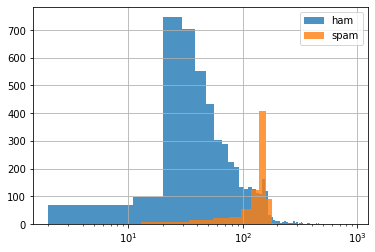

In [14]:
plt.xscale('log')
df[df['verdict'] == 'ham']['length'].hist(bins=100,alpha=0.8)
df[df['verdict'] == 'spam']['length'].hist(alpha=0.8)
plt.legend(('ham','spam'))


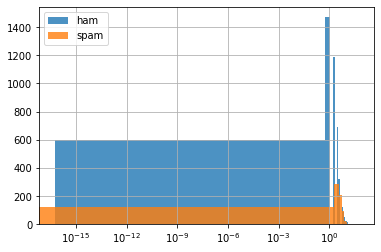

In [15]:
plt.xscale('log')
df[df['verdict'] == 'ham']['punctuation'].hist(bins=100,alpha=0.8)
df[df['verdict'] == 'spam']['punctuation'].hist(alpha=0.8)
plt.legend(('ham','spam'))

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
X = df[['length','punctuation']].values
y = df['verdict'].values

In [18]:
le = LabelEncoder()

In [19]:
y = le.fit_transform(y)

In [20]:
X

array([[111,   4],
       [ 29,   2],
       [155,   1],
       ...,
       [ 57,   5],
       [125,   0],
       [ 26,   1]], dtype=int64)

In [21]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit(X).transform(X)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
classifier = LogisticRegression()

In [26]:
classifier.fit(X_train,y_train)

C:\Users\BibhuJha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
confusion_matrix(y_test,y_pred)

array([[1549,   44],
       [ 245,    1]], dtype=int64)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.02      0.00      0.01       246

    accuracy                           0.84      1839
   macro avg       0.44      0.49      0.46      1839
weighted avg       0.75      0.84      0.79      1839



In [31]:
# Now let's try with the other model
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [32]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)
confusion_matrix(y_test,classifier.predict(X_test))

array([[1550,   43],
       [ 203,   43]], dtype=int64)

In [33]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
confusion_matrix(y_test,classifier.predict(X_test))

array([[1593,    0],
       [ 246,    0]], dtype=int64)

In [34]:
from sklearn.svm import SVC

In [35]:
classifier = SVC()

classifier.fit(X_train,y_train)
confusion_matrix(y_test,classifier.predict(X_test))

C:\Users\BibhuJha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[1521,   72],
       [ 138,  108]], dtype=int64)

In [36]:
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1593
           1       0.60      0.44      0.51       246

    accuracy                           0.89      1839
   macro avg       0.76      0.70      0.72      1839
weighted avg       0.87      0.89      0.88      1839



In [37]:
# Text features extraction
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
cv = CountVectorizer()

In [39]:
X = df['msg'].values

In [40]:
X = cv.fit_transform(X).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [203]:
from sklearn.naive_bayes import GaussianNB

In [204]:
classifier = GaussianNB()

In [205]:
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [207]:
confusion_matrix(y_test,classifier.predict(X_test))

array([[1436,  161],
       [  18,  224]], dtype=int64)

In [208]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

confusion_matrix(y_test,classifier.predict(X_test))

C:\Users\BibhuJha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[1597,    0],
       [  52,  190]], dtype=int64)